In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
cv2.__version__

'4.1.1'

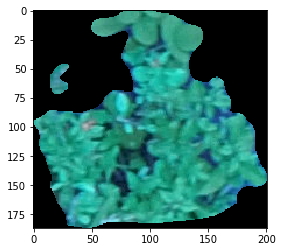

In [7]:
DATA_DIR='weed-detection-in-soybean-crops\dataset'
CATEGORIES=['broadleaf', 'soyabean','grass','soil']

for category in CATEGORIES:
    path = os.path.join(DATA_DIR, category)
    
    for img in os.listdir(path):
        img_path=os.path.join(path,img)
        img_array= cv2.imread(img_path )
        
        plt.imshow(img_array)
        plt.show()
        break
    break

In [8]:
dir(cv2)

['',
 'ACCESS_FAST',
 'ACCESS_MASK',
 'ACCESS_READ',
 'ACCESS_RW',
 'ACCESS_WRITE',
 'ADAPTIVE_THRESH_GAUSSIAN_C',
 'ADAPTIVE_THRESH_MEAN_C',
 'AGAST_FEATURE_DETECTOR_AGAST_5_8',
 'AGAST_FEATURE_DETECTOR_AGAST_7_12D',
 'AGAST_FEATURE_DETECTOR_AGAST_7_12S',
 'AGAST_FEATURE_DETECTOR_NONMAX_SUPPRESSION',
 'AGAST_FEATURE_DETECTOR_OAST_9_16',
 'AGAST_FEATURE_DETECTOR_THRESHOLD',
 'AKAZE',
 'AKAZE_DESCRIPTOR_KAZE',
 'AKAZE_DESCRIPTOR_KAZE_UPRIGHT',
 'AKAZE_DESCRIPTOR_MLDB',
 'AKAZE_DESCRIPTOR_MLDB_UPRIGHT',
 'AKAZE_create',
 'AgastFeatureDetector',
 'AgastFeatureDetector_AGAST_5_8',
 'AgastFeatureDetector_AGAST_7_12d',
 'AgastFeatureDetector_AGAST_7_12s',
 'AgastFeatureDetector_NONMAX_SUPPRESSION',
 'AgastFeatureDetector_OAST_9_16',
 'AgastFeatureDetector_THRESHOLD',
 'AgastFeatureDetector_create',
 'Algorithm',
 'AlignExposures',
 'AlignMTB',
 'AsyncArray',
 'BFMatcher',
 'BFMatcher_create',
 'BORDER_CONSTANT',
 'BORDER_DEFAULT',
 'BORDER_ISOLATED',
 'BORDER_REFLECT',
 'BORDER_REFLECT101',


In [10]:
img_array.shape

(187, 201, 3)

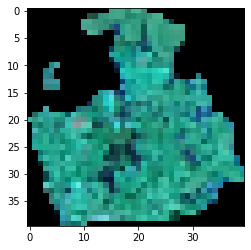

(40, 40, 3)

In [14]:
IMG_SIZE=40

new_img_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_img_array)
plt.show()
new_img_array.shape

In [16]:
training_data=[]

def create_training_data():
    DATA_DIR='weed-detection-in-soybean-crops\dataset'
    CATEGORIES=['broadleaf', 'soybean','grass','soil']

    for category in CATEGORIES:
        path = os.path.join(DATA_DIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_path=os.path.join(path,img)
                img_array= cv2.imread(img_path )
                new_img_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_img_array,class_num])
            except Exception as e:
                pass
            
create_training_data()
    

In [31]:
print(len(training_data))
training_data[0]

15336


[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8), 0]

In [36]:
import random

random.shuffle(training_data)

In [37]:
for sample in training_data[:10]:
    print(sample[1])

1
1
3
1
3
1
2
3
2
3


In [52]:
X=[]
y=[]


In [53]:
for features, label in training_data:
    X.append(features)
    y.append(label)
X=np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,3)


In [54]:
len(X)

15336

In [59]:
#save the train data
import pickle
pickle_open=open('X.train','wb')
pickle.dump(X,pickle_open)
pickle_open.close()

pickle_open=open('y.train','wb')
pickle.dump(y,pickle_open)
pickle_open.close()

In [60]:
#call the train data
pickle_in=open('X.train','rb')
X=pickle.load(pickle_in)
pickle_in.close()

pickle_in=open('y.train','rb')
y=pickle.load(pickle_in)
pickle_in.close()

In [63]:
X[0]
y[0]

1

In [64]:
#build a neural network using keras



In [67]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten

In [70]:
#normalize the data in X
MAX_PIXEL_VALUE=255.0
X=X/MAX_PIXEL_VALUE


#actual model

model=Sequential()
#1st layer
model.add(Conv2D(64, (3,3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#2nd layer
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#3rd layer
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
#final layer
model.add(Dense(1))
model.add(Activation('relu'))

#compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#fit the model to data
model.fit(X, y, batch_size=32, epochs=3, validation_split=0.1)

Train on 13802 samples, validate on 1534 samples
Epoch 1/3
13802/13802 [==============================] - 36s 3ms/sample - loss: -8.5054 - acc: 0.4735 - val_loss: -8.4263 - val_acc: 0.4772
Epoch 2/3
13802/13802 [==============================] - 36s 3ms/sample - loss: -8.8698 - acc: 0.4814 - val_loss: -8.4263 - val_acc: 0.4772
Epoch 3/3
13802/13802 [==============================] - 36s 3ms/sample - loss: -8.8698 - acc: 0.4814 - val_loss: -8.4263 - val_acc: 0.4772
